[first data from](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import csv

2) чистка и нормализация входных данных, удаление первого столбца и первой строки

In [6]:
file = open("emails.csv", 'r')
reader = csv.reader(file)

raw_data = []
for row in reader:
    raw_data.append(row)
raw_data = raw_data[1:]
for row in raw_data:
    del row[0]

file.close()

data = []
for row in raw_data:
    data.append([int(x) for x in row])

x = [row[:-1] for row in data]
y = [row[-1] for row in data]

x = normalize(x, axis = 0)

3) визуализация набора данных с использованием методов снижения размерности

In [7]:
def plot_PCA(show_data):
    
    pca=PCA(n_components=2)
    reduced_data = pca.fit_transform(show_data)

    fig, ax = plt.subplots()
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1],
               cmap=plt.cm.autumn, edgecolor='b')
    ax.set_title("PCA plot")
    
    plt.show()    

In [8]:
def plot_TSNE(show_data):
    tsne=TSNE()
    reduced_data = tsne.fit_transform(show_data)

    fig, ax = plt.subplots()
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b')
    ax.set_title("TSNE plot")
    
    plt.show()

3) визуализация набора данных с использованием методов снижения размерности

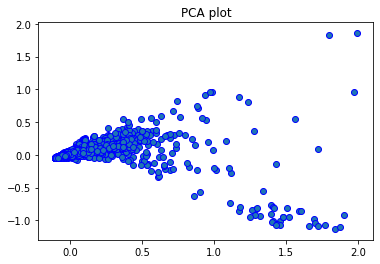

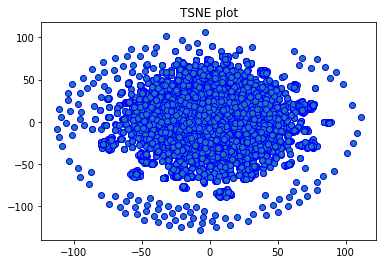

In [9]:
plot_PCA(x)
plot_TSNE(x)

1) построить нейронную сеть и обучить ее, все сделано с персептроном с внутренними слоями 64 и 64

In [10]:
def train_MLPC(layers, x = x, y = y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
        
    model = MLPClassifier(layers, activation='tanh')
    model.fit(train_x, train_y)

    y_hat = model.predict(test_x)

    return accuracy_score([[i] for i in test_y], y_hat)

In [11]:
%%time
accuracy = [train_MLPC((64, 64))]
print(accuracy[0])

0.966183574879227
Wall time: 38.8 s


4) поэкспериментировать с несколькими структурами нейросети

In [ ]:
%%time
accuracy.append(train_MLPC((16)))
accuracy.append(train_MLPC((32, 32)))
accuracy.append(train_MLPC((64, 64, 64)))
accuracy.append(train_MLPC((128, 128)))
accuracy.append(train_MLPC((256)))
accuracy.append(train_MLPC((256, 128, 64)))
accuracy.append(train_MLPC((256, 128, 256)))

for i in accuracy:
    print(i)

print("max accuracy : ", max(accuracy))